In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('Group_20_data_cleaned.csv')

In [3]:
df.drop('Unnamed: 0', axis = 1 , inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Letter  20000 non-null  object 
 1   x-box   20000 non-null  int64  
 2   y-box   20000 non-null  int64  
 3   width   20000 non-null  int64  
 4   high    20000 non-null  int64  
 5   onpix   20000 non-null  int64  
 6   x-bar   20000 non-null  float64
 7   y-bar   20000 non-null  int64  
 8   x2bar   20000 non-null  int64  
 9   y2bar   20000 non-null  int64  
 10  xybar   20000 non-null  float64
 11  x2ybr   20000 non-null  int64  
 12  xy2br   20000 non-null  float64
 13  x-ege   20000 non-null  float64
 14  xegvy   20000 non-null  float64
 15  y_ege   20000 non-null  float64
 16  yegvx   20000 non-null  float64
dtypes: float64(7), int64(9), object(1)
memory usage: 2.6+ MB


In [5]:
df.head()

,Letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y_ege,yegvx
0,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
1,I,5,12,3,7,2,10.0,5,5,4,13.0,3,9.0,2.0,8.0,4.0,10.0
2,D,4,11,6,8,6,10.0,6,2,6,10.0,3,7.0,3.0,7.0,3.0,9.0
3,N,7,11,6,6,3,5.0,9,4,6,4.0,4,10.0,6.0,10.0,2.0,8.0
4,G,2,1,3,1,1,8.0,6,6,6,6.0,5,9.0,1.0,7.0,5.0,10.0


In [6]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y_ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897605,7.500450,4.628600,5.178650,8.282055,6.45400,7.92901,3.046105,8.338865,3.691760,7.801220
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026038,2.325354,2.699968,2.380823,2.488470,2.63107,2.08062,2.332534,1.546721,2.567059,1.617475
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.00000,1.000000,8.000000,2.000000,7.000000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.00000,3.000000,8.000000,3.000000,8.000000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.00000,4.000000,9.000000,5.000000,9.000000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.00000,15.000000,15.000000,15.000000,15.000000


In [7]:
order = list(np.sort(df['Letter'].unique()))
print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


<AxesSubplot:xlabel='Letter', ylabel='x-box'>

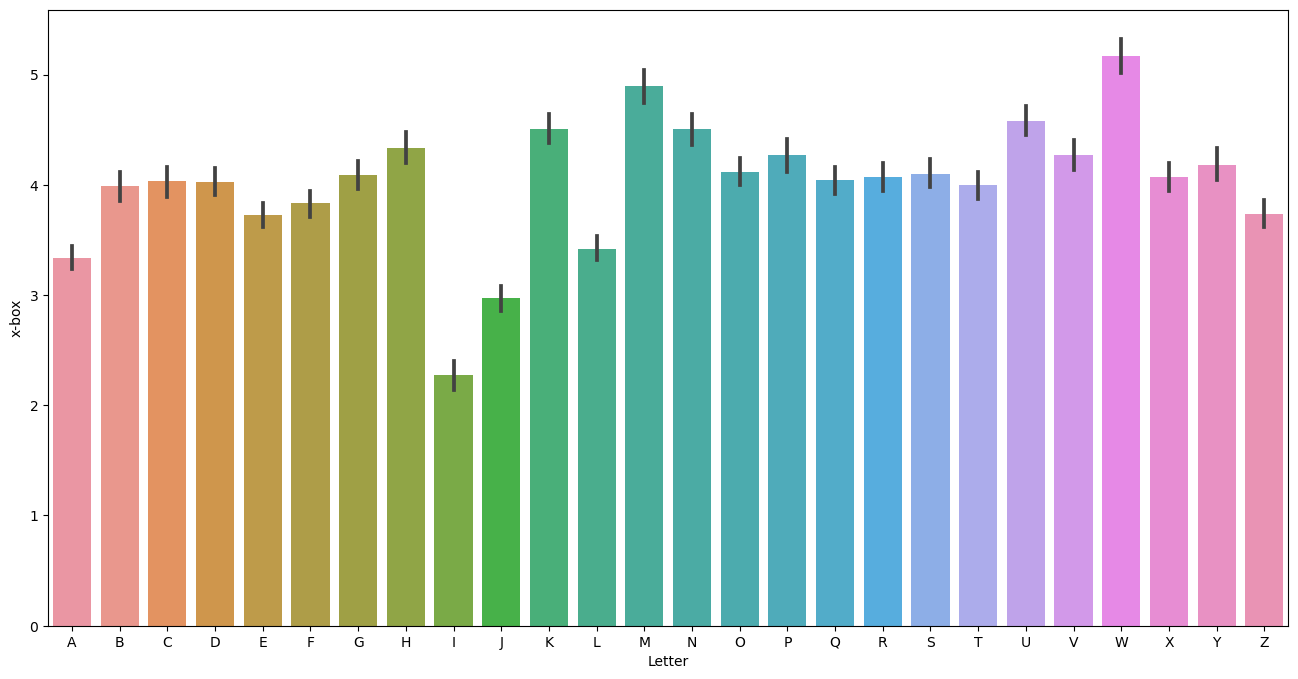

In [8]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Letter', y='x-box', 
            data=df, 
            order=order)

In [9]:
X = df.drop('Letter', axis = 1)

In [10]:
y = df.Letter

In [11]:
y.head()

0    T
1    I
2    D
3    N
4    G
Name: Letter, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y["labeled"] = le.fit_transform(y)

In [70]:
y["labeled"].shape

(20000,)

In [14]:
X.to_numpy()

array([[ 2. ,  8. ,  3. , ...,  8.3,  0.2,  8.4],
       [ 5. , 12. ,  3. , ...,  8. ,  4. , 10. ],
       [ 4. , 11. ,  6. , ...,  7. ,  3. ,  9. ],
       ...,
       [ 6. ,  9. ,  6. , ..., 12. ,  2. ,  4. ],
       [ 2. ,  3. ,  4. , ...,  9. ,  5. ,  8. ],
       [ 4. ,  9. ,  6. , ...,  7. ,  2. ,  8. ]])

In [76]:
y1=y["labeled"]
y1.shape


(20000,)

In [43]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y1, test_size = 0.2 , random_state = 1)

In [40]:
clf = LogisticRegression(lr=0.001)
clf.fit(X_train,Y_train)


In [41]:
y_pred = clf.predict(X_test)

In [67]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, Y_test)

In [54]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [52]:
clf1 = LogisticRegression()
clf1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [50]:
clf1.fit(X_train,Y_train)

LogisticRegression()

In [51]:
clf1.score(X_test,Y_test)

0.754

In [58]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=clf1, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Best: 0.776750 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.776750 (0.000231) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.763937 (0.000817) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.723875 (0.005600) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.776688 (0.000136) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.764375 (0.000383) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.721812 (0.005101) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.776500 (0.000829) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.763875 (0.002305) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.718562 (0.005855) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.774562 (0.003462) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.762437 (0.002176) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.709375 (0.006791) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.759687 (0.004926) wit

In [ ]:
### Best: 0.776750 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [61]:
modelf1 = LogisticRegression(C= 100, penalty = 'l2' , solver ='newton-cg')

In [62]:
modelf1.fit(X_train,Y_train)

LogisticRegression(C=100, solver='newton-cg')

In [63]:
modelf1.score(X_test,Y_test)

0.76625

In [64]:
y_pred1 = modelf1.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test,y_pred1)
print(cm1)

[[146   0   0   0   0   0   0   1   0   1   3   0   1   1   1   0   1   1
    2   0   0   2   1   1   0   0]
 [  1 110   1   4   1   1   4   3   6   1   0   0   0   0   2   2   2   6
    4   0   0   1   0   2   1   0]
 [  0   0 110   2   5   0   8   1   0   0  12   1   0   0   0   0   1   0
    1   3   0   0   0   0   0   0]
 [  0   5   0 135   0   0   1   2   0   0   0   0   0   0   3   1   0   1
    0   5   0   0   0   2   0   1]
 [  0   4   0   0 113   0   7   0   0   0   2   0   0   0   0   0   4   1
    4   4   0   0   0   0   0   0]
 [  1   2   1   2   3 105   4   0   1   1   1   0   0   1   0   6   0   0
    3   7   1   0   1   2   2   0]
 [  0   2  23   2   2   0  75   1   0   0   5   6   2   0   1   6  13   4
    8   0   1   3   0   0   0   0]
 [  2   3   1   9   0   6   2  65   0   3  10   1   1   5  10   2   2  11
    0   0   5   4   0   2   2   0]
 [  1   0   0   1   0   1   0   0 117   4   1   1   0   0   1   2   0   0
    0   0   0   0   0   6   0   3]
 [  3   0   0   1  

In [65]:
clf1 = classification_report(Y_test, y_pred1)
print(clf1)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       162
           1       0.67      0.72      0.70       152
           2       0.72      0.76      0.74       144
           3       0.76      0.87      0.81       156
           4       0.72      0.81      0.76       139
           5       0.74      0.73      0.74       144
           6       0.56      0.49      0.52       154
           7       0.48      0.45      0.46       146
           8       0.84      0.85      0.84       138
           9       0.85      0.82      0.83       141
          10       0.62      0.69      0.66       137
          11       0.82      0.81      0.81       139
          12       0.88      0.90      0.89       145
          13       0.91      0.85      0.88       161
          14       0.75      0.66      0.70       173
          15       0.85      0.79      0.82       174
          16       0.74      0.77      0.75       159
          17       0.68    

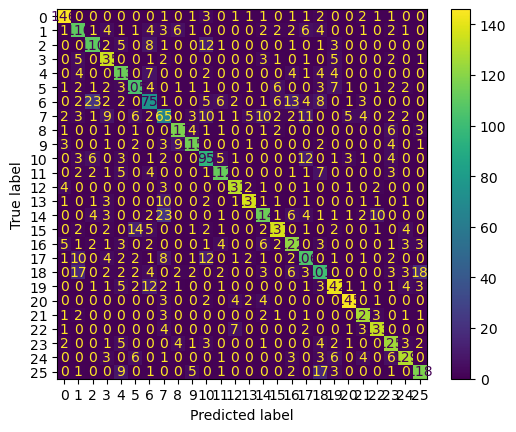

In [66]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelf1, X_test, Y_test)  
plt.show()